In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns

# Loading the datasets

In [18]:
plant_gen = pd.read_csv('../../data/Plant_1_Generation_Data.csv')
plant_weat = pd.read_csv('../../data/Plant_1_Weather_Sensor_Data.csv')
plant_gen['DATE_TIME'] = pd.to_datetime(plant_gen['DATE_TIME'])
plant_weat['DATE_TIME'] = pd.to_datetime(plant_weat['DATE_TIME'])

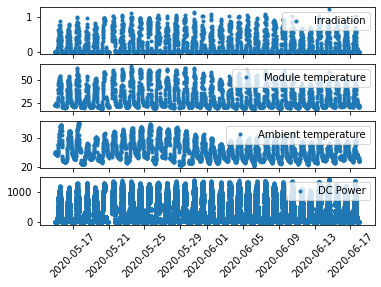

In [19]:
f, ax=plt.subplots(4, 1, sharex=True)
ax[0].plot(plant_weat['DATE_TIME'], plant_weat['IRRADIATION'], '.', label="Irradiation")
ax[1].plot(plant_weat['DATE_TIME'], plant_weat['MODULE_TEMPERATURE'], '.', label="Module temperature")
ax[2].plot(plant_weat['DATE_TIME'], plant_weat['AMBIENT_TEMPERATURE'], '.', label="Ambient temperature")
ax[3].plot(plant_gen['DATE_TIME'], plant_gen['AC_POWER'], '.', label="DC Power")
plt.xticks(rotation=45)
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

In [20]:
plant_gen = pd.read_csv('../../data/Plant_2_Generation_Data.csv')
plant_weat = pd.read_csv('../../data/Plant_2_Weather_Sensor_Data.csv')
plant_gen['DATE_TIME'] = pd.to_datetime(plant_gen['DATE_TIME'])
plant_weat['DATE_TIME'] = pd.to_datetime(plant_weat['DATE_TIME'])

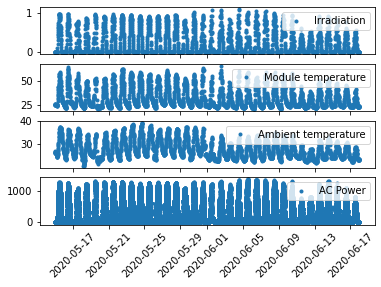

In [21]:
f, ax=plt.subplots(4, 1, sharex=True)
ax[0].plot(plant_weat['DATE_TIME'], plant_weat['IRRADIATION'], '.', label="Irradiation")
ax[1].plot(plant_weat['DATE_TIME'], plant_weat['MODULE_TEMPERATURE'], '.', label="Module temperature")
ax[2].plot(plant_weat['DATE_TIME'], plant_weat['AMBIENT_TEMPERATURE'], '.', label="Ambient temperature")
ax[3].plot(plant_gen['DATE_TIME'], plant_gen['AC_POWER'], '.', label="AC Power")
plt.xticks(rotation=45)
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

In [15]:
plant_gen.columns, plant_weat.columns

(Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
        'DAILY_YIELD', 'TOTAL_YIELD'],
       dtype='object'),
 Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE',
        'MODULE_TEMPERATURE', 'IRRADIATION'],
       dtype='object'))

In [16]:
print(plant_gen['SOURCE_KEY'].nunique(), plant_weat['SOURCE_KEY'].nunique())

22 1


In [6]:
inverter=plant_gen['SOURCE_KEY'].unique()
inverter

array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
       'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
       'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
       'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
       'YxYtjZvoooNbGkE'], dtype=object)

In [7]:
plant_gen.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


# Study weather data

# Study the power generation behaviour (AC or DC power) of a single inverter and its evolution/changes in time

## Daily profile of the AC and DC curves for a single inverter

In [11]:
inverter0= data[data.SOURCE_KEY == inverter[0]]
inverter0.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,3154.0,3154.000000,3154.000000,3154.000000,3.154000e+03
mean,4135001.0,2873.720981,281.124073,3230.658151,6.377464e+06
std,0.0,3761.145773,367.646871,2934.746921,6.689966e+04
min,4135001.0,0.000000,0.000000,0.000000,6.259559e+06
25%,4135001.0,0.000000,0.000000,1.129464,6.320403e+06
50%,4135001.0,302.955357,29.261607,3019.187500,6.381896e+06
75%,4135001.0,5775.531250,565.209375,5911.000000,6.439060e+06
max,4135001.0,13335.142860,1300.171429,8268.000000,6.485319e+06


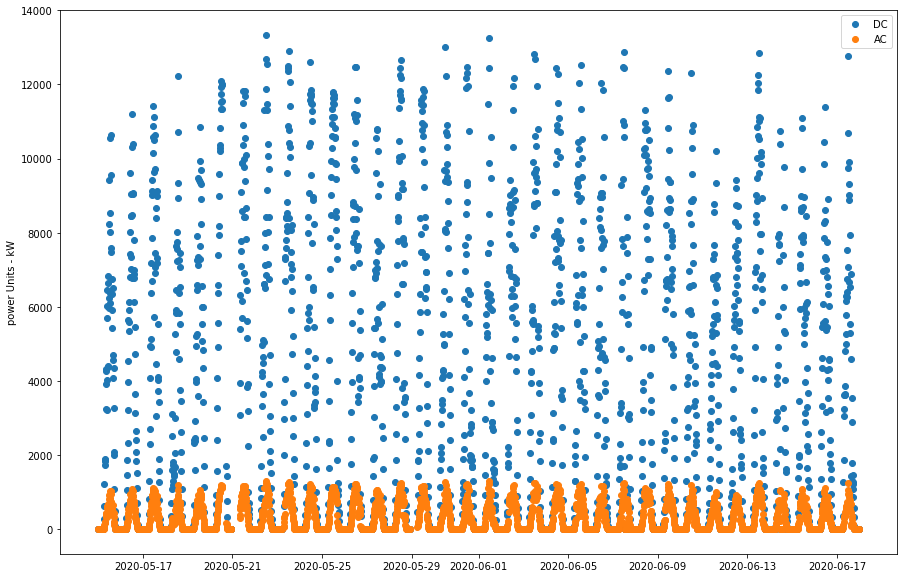

In [12]:
plt.figure(figsize=(15, 10))
plt.plot_date(inverter0['DATE_TIME'], inverter0['DC_POWER'])
plt.plot_date(inverter0['DATE_TIME'], inverter0['AC_POWER'])

plt.legend(["DC", "AC"])
plt.ylabel("power Units - kW")
plt.show()

In [ ]:
##overplot AC and DC